(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


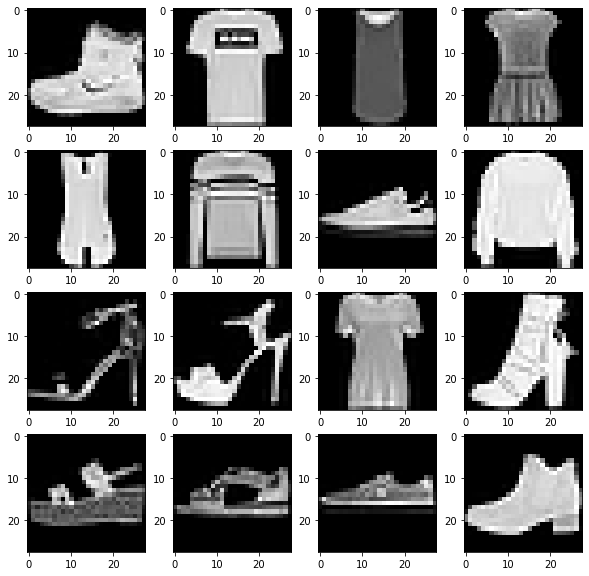

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 3, 3, 64)          18496     
_________________________________________________________________
flatten_16 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_34 (Dense)   

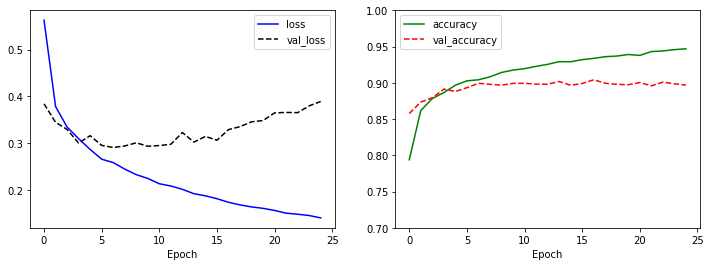

(90000, 28, 28, 1)
Epoch 1/25
2110/2110 [==============================] - 255s 121ms/step - loss: 0.7971 - accuracy: 0.7032 - val_loss: 0.5879 - val_accuracy: 0.7751
Epoch 2/25
2110/2110 [==============================] - 258s 122ms/step - loss: 0.3951 - accuracy: 0.8563 - val_loss: 0.4994 - val_accuracy: 0.8108
Epoch 3/25
2110/2110 [==============================] - 252s 120ms/step - loss: 0.3448 - accuracy: 0.8749 - val_loss: 0.4572 - val_accuracy: 0.8278
Epoch 4/25
2110/2110 [==============================] - 229s 109ms/step - loss: 0.3256 - accuracy: 0.8830 - val_loss: 0.4450 - val_accuracy: 0.8340
Epoch 5/25
2110/2110 [==============================] - 251s 119ms/step - loss: 0.3102 - accuracy: 0.8884 - val_loss: 0.4233 - val_accuracy: 0.8423
Epoch 6/25
2110/2110 [==============================] - 233s 111ms/step - loss: 0.2957 - accuracy: 0.8938 - val_loss: 0.4177 - val_accuracy: 0.8505
Epoch 7/25
2110/2110 [==============================] - 238s 113ms/step - loss: 0.2901 - accu

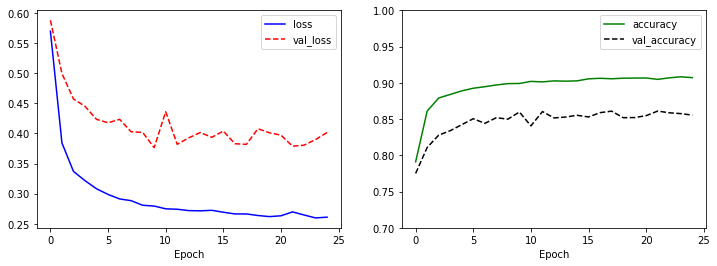

[0.21762241423130035, 0.9211999773979187]

In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt


fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X,train_Y) , (test_X,test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

print(train_X.shape, test_X.shape)
train_X = train_X.reshape(-1,28,28,1)
test_X = test_X.reshape(-1,28,28,1)

#데이터크기
print(train_X.shape, test_X.shape)

plt.figure(figsize = (10,10))

#16개의 이미지 출력하기
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(train_X[i].reshape(28,28), cmap = 'gray')
plt.show()
print(train_Y[:16])

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size = (3,3), filters = 16),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters = 32),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 64),
    tf.keras.layers.Flatten(), # 이미지이므로 차원 줄이기
    tf.keras.layers.Dense(units=  128, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.3),
    tf.keras.layers.Dense(units =10, activation = 'softmax')
])

model.compile(optimizer= tf.keras.optimizers.Adam(),
             loss= 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.summary()

history = model.fit(train_X, train_Y, epochs = 25, validation_split= 0.25)
plt.figure(figsize= (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'k--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label = 'accuracy')
plt.plot(history.history['val_accuracy'],'r--',label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()
plt.show()



model.evaluate(test_X, test_Y, verbose = 0)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import random

#다양한 변형된 이미지 
image_generator = ImageDataGenerator(
    rotation_range = 10,
    zoom_range= 0.10,
    shear_range = 0.5,
    width_shift_range= 0.10,
    height_shift_range = 0.10,
    horizontal_flip= True,
    vertical_flip= False
)

augment_size = 30000
randidx = np.random.randint(train_X.shape[0], size= augment_size)
x_augmented = train_X[randidx].copy()
y_augmented = train_Y[randidx].copy()

#flow()-> 보강된 이미지 생성
#bitch_size -> 한번에 생성할 이미지 생성
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size), batch_size = augment_size, shuffle= False).next()[0]


train_X = np.concatenate((train_X, x_augmented))
train_Y = np.concatenate((train_Y, y_augmented))

print(train_X.shape)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape = (28,28,1), kernel_size = (3,3) , filters= 32,
                           padding = 'same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 64, padding ='same', activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 128, padding = 'same', activation = 'relu'),
    tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 256, padding = 'valid', activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 512, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units = 256, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units = 10, activation='softmax')
])

model.compile(optimizer =tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_X, train_Y, epochs = 25, validation_split = 0.25)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-',label = 'loss')
plt.plot(history.history['val_loss'], 'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose = 0)

In [19]:
X = []
Y = []

for i in range(6):
    lst = list(range(i,i+4))

    X.append(list(map(lamba c : [c/10], lst)))
    Y.append((i+4)/10)
X = np.array(X)
Y = np.array(Y)
for i in range(len(X)):
    print(X[i], Y[i])
    

SyntaxError: invalid syntax (<ipython-input-19-edcf9f1ff0a6>, line 7)